# Ejemplo de CNN 2D en la base de datos cifar100

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.14.0


In [50]:
# descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [51]:
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape)

(50000, 32, 32, 3)


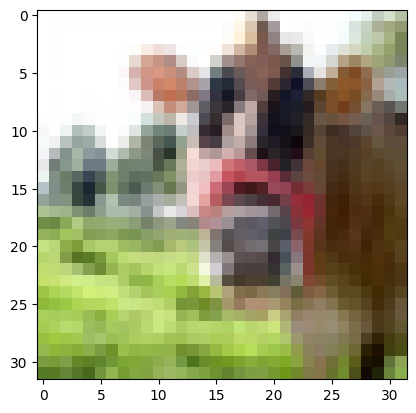

In [52]:
import matplotlib.pyplot as plt

# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [53]:
M = X_train.max()
M

255

In [54]:
X_train = X_train[0:10000,:,:,:]/M
X_test = X_test[0:10000,:,:,:]/M
y_train = y_train[0:10000]
y_test = y_test[0:10000]

In [55]:
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [56]:
X_train.max()

1.0

Modelo

In [137]:
# Hacemos un modelo con varias capas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from tensorflow.keras import regularizers


In [ ]:

#crear modelo
model = Sequential()

#Vamos añadiendo capas
model.add(Conv2D(200, kernel_size=3, activation='relu', input_shape=(32,32,3),
                activity_regularizer=regularizers.l1(0.000)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(2))
model.add(Conv2D(200, kernel_size=5, activation='relu',
                activity_regularizer=regularizers.l1(0.000)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(2))
model.add(Conv2D(200, kernel_size=3, activation='relu',
                activity_regularizer=regularizers.l1(0.000)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Dropout(0.4))
model.add(Flatten())
#model.add(Dense(200))
model.add(Dense(100, activation='softmax'))

In [ ]:
# Vamos a usar el callback de earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=30)#, callbacks=[early_stopping])


# Modelo que se que funciona bien

In [148]:
from tensorflow import keras

#crear modelo
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                input_shape=(32,32,3),
                kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                padding='valid'
                ))
model.add(BatchNormalization()) # Capa batch normalization
model.add(keras.layers.Activation('gelu')) # Aplicamos la activación después de aplicar el batch normalization
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),
                kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                padding='valid'))
model.add(BatchNormalization()) # Capa batch normalization
model.add(keras.layers.Activation('gelu')) # Aplicamos la activación después de aplicar el batch normalization
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3),
                 kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                 padding='valid'))
model.add(BatchNormalization()) # Capa batch normalization
model.add(keras.layers.Activation('gelu')) # Aplicamos la activación después de aplicar el batch normalization

model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(256,
                kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                kernel_regularizer=regularizers.l1_l2(0.0001)))
model.add(BatchNormalization()) # Capa batch normalization
model.add(keras.layers.Activation('gelu')) # Aplicamos la activación después de aplicar el batch normalization
model.add(Dropout(0.3))

model.add(Dense(100,
                kernel_initializer=keras.initializers.GlorotNormal(seed=42),
                kernel_regularizer=regularizers.l1(0.0001),
                activation='softmax'))

# Compilamos el modelo
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Este es el modelo
model.summary()




Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_41 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_8 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_35 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 13, 64)      

In [138]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [151]:
# Vamos a usar el callback de earlystopping y ReduceLROnPlateau
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=0.0001, factor=0.5, min_lr=0.00001)

In [152]:

# Entrenamos

hist = model.fit(X_train,
                 y_train,
                 validation_split=0.1,
                 epochs=100,
                 callbacks=[early_stopping, reduce_lr],
                 verbose=1,
                 batch_size=300,
                 use_multiprocessing=True
                 )

Epoch 1/100
30/30 [==============================] - 8s 49ms/step - loss: 6.0973 - accuracy: 0.0630 - val_loss: 5.4401 - val_accuracy: 0.0180 - lr: 0.0100
Epoch 2/100
30/30 [==============================] - 1s 30ms/step - loss: 4.5788 - accuracy: 0.1243 - val_loss: 5.5362 - val_accuracy: 0.0360 - lr: 0.0100
Epoch 3/100
30/30 [==============================] - 1s 32ms/step - loss: 4.4578 - accuracy: 0.1496 - val_loss: 5.7186 - val_accuracy: 0.0290 - lr: 0.0100
Epoch 4/100
30/30 [==============================] - 1s 31ms/step - loss: 4.3932 - accuracy: 0.1753 - val_loss: 5.5873 - val_accuracy: 0.0450 - lr: 0.0100
Epoch 5/100
30/30 [==============================] - 1s 29ms/step - loss: 4.3064 - accuracy: 0.1897 - val_loss: 5.6370 - val_accuracy: 0.0480 - lr: 0.0100
Epoch 6/100
30/30 [==============================] - 1s 29ms/step - loss: 4.2637 - accuracy: 0.2080 - val_loss: 5.4105 - val_accuracy: 0.0670 - lr: 0.0100
Epoch 7/100
30/30 [==============================] - 1s 30ms/step - lo

In [153]:
# Evaluamos el modelo
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 2.9516 - accuracy: 0.3855


[2.9516332149505615, 0.3855000138282776]

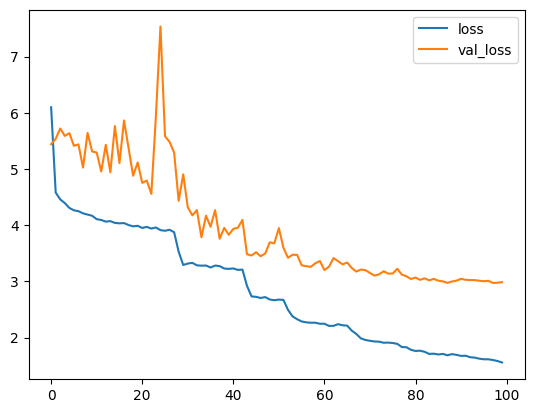

In [154]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()


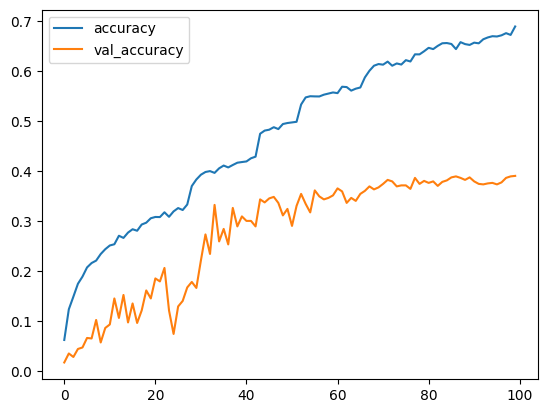

In [155]:
# Ploteamos la evolucion del accuracy durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()


In [32]:
# Predecimos sobre test
preds_test = model.predict(X_test)
preds_test.shape

313/313 [==============================] - 1s 2ms/step


(10000, 100)

63


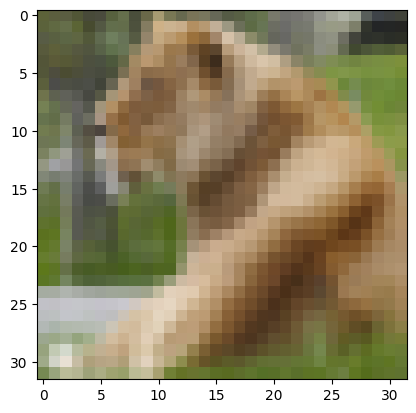

In [33]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 2990
# Mostramos la imagen
plt.imshow(X_test[idx_mostrar,:,:,:])
# Mostramos las probabilidades que da el modelo a cada clase
print(np.argmax(preds_test[idx_mostrar]))